In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
plt.style.use('seaborn-darkgrid')

In [3]:
path = 'LEA_expression_last.xlsx'
assert os.path.exists(path)

In [4]:
df = pd.read_excel(path, sheet_name='LEA orthologs final')
df.rename(columns={
    'reh24': 'reh15',
    'reh48': 'reh16',
    'reh24.1': 'reh15.1',
    'reh48.1': 'reh16.1',
}, inplace=True)

In [5]:
times = [
    'dry3', 
    'dry7',
    'dry10', 
    'dry14',
    'reh15',
    'reh16',
]
all_times = ['untreated', *times]

diff_times = [3, 7, 10, 14, 15, 16]
all_diff_times = [0, *diff_times]

brevidens_rows = all_times
subracemosa_rows = [f'{row}.1' for row in all_times]

# Brevidens

In [6]:
# Slice only rows containing data (needs to have a gene name!) 
# and keep useful data for visualization

brevidens_slice = df['L. brevidens gene name'].notna()
print(f'There are {brevidens_slice.sum()} genes measured for Brevidens.')

There are 77 genes measured for Brevidens.


In [7]:
brevidens_data = pd.DataFrame(df.loc[brevidens_slice, brevidens_rows], index=df.index[brevidens_slice])
brevidens_data.index = df.loc[brevidens_slice, 'L. brevidens gene name']
brevidens_data.head()

,untreated,dry3,dry7,dry10,dry14,reh15,reh16
L. brevidens gene name,,,,,,,
LbDhn1,9343.823333,1854.623333,337.178667,821.920000,1426.150000,547.741333,454.658000
LbDhn2,142.113667,138.039000,2254.236667,1493.020000,2281.060000,851.895000,931.939667
LbDhn3,1063.956667,1364.643333,477.139000,137.194333,138.269000,553.902333,259.688000
LbDhn4,369.457667,194.452333,1186.246667,341.846667,1224.486667,253.282333,253.123333
LbDhn5,288.053667,128.646000,0.052759,0.175396,0.031206,0.733659,0.679707


In [8]:
for measurement in times:
    brevidens_data[f'{measurement}.diff'] = np.log2(
        (brevidens_data[measurement] + 1) / 
        (brevidens_data['untreated'] + 1)
    )

In [9]:
brevidens_unnormalized_spaghetti_df = brevidens_data[brevidens_rows].T
brevidens_unnormalized_spaghetti_df.index = all_times
brevidens_unnormalized_spaghetti_df.index.name = 'Time'

Below we plot the progression of Brevidens genes' expressions after drying for up to 14 hours. This is displayed on a log scale because it's raw differential gene expression values.

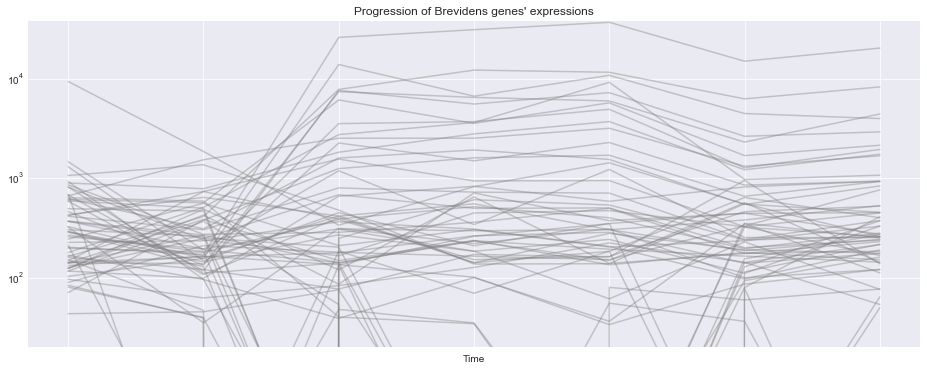

In [10]:
plt.figure(figsize=(16, 6))
ax = plt.gca()

brevidens_unnormalized_spaghetti_df.plot.line(
    legend=False, 
    title="Progression of Brevidens genes' expressions",
    ax=ax, 
    logy=True,
    grid=True,
    ylim=[10, brevidens_unnormalized_spaghetti_df.max().max() + 1000],
    alpha=0.4,
    color='grey',
)
plt.savefig('brevidens_progression_unnormalized.png', dpi=300)
plt.show()

In [11]:
brevidens_diff_measurements = [f'{time}.diff' for time in times]

brevidens_normalized_spaghetti_df = brevidens_data[brevidens_diff_measurements].T
brevidens_normalized_spaghetti_df.index = diff_times
brevidens_normalized_spaghetti_df.index.name = 'Time'

Which genes are higher than 5 after 7 hours?

In [12]:
time = 7
cutoff = 3
interestting_brevidens_df = brevidens_normalized_spaghetti_df.T[brevidens_normalized_spaghetti_df.T[time] > cutoff]
interestting_brevidens_df

Time,3,7,10,14,15,16
L. brevidens gene name,,,,,,
LbDhn2,-0.041672,3.978045,3.383966,3.995103,2.575207,2.704622
LbDhn6,1.506616,3.928104,4.330437,5.673880,2.434140,2.575378
LbDhn7,-0.155119,7.062349,5.670034,7.059561,-0.070178,0.303238
LbLEA1-1,-0.238307,6.994702,7.251734,7.498422,6.199717,6.638102
LbLEA2-3b,1.328911,5.566694,6.210720,6.138403,5.250928,5.648948
LbLEA2-6,-0.163490,6.901174,0.090381,5.656647,5.063545,0.000714
LbLEA2-16,2.401731,4.116226,4.474789,4.560019,3.193668,3.684835
LbLEA4-3,-1.054471,5.405307,4.349561,5.046245,3.771158,3.602031
LbLEA4-4,-0.107126,3.319748,2.540537,3.223168,1.463538,1.809720


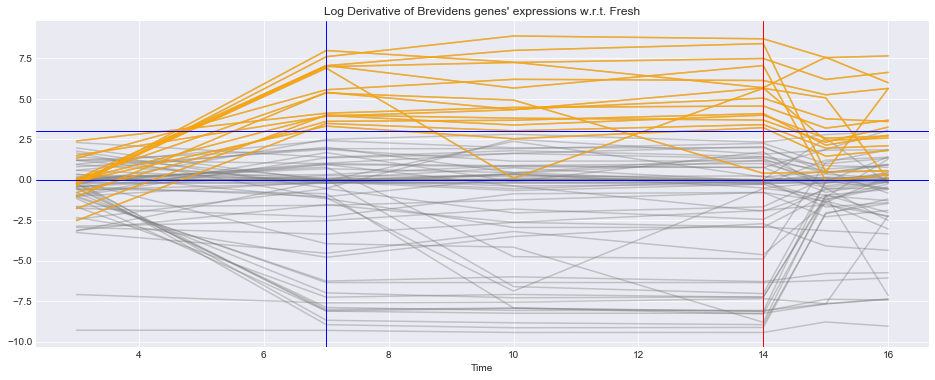

In [13]:
plt.figure(figsize=(16, 6))
ax = plt.gca()

brevidens_normalized_spaghetti_df.plot.line(
    legend=False, 
    title="Log Derivative of Brevidens genes' expressions w.r.t. Fresh",
    ax=ax, 
    grid=True,
    alpha=0.4,
    color='grey',
)

interestting_brevidens_df.T.plot.line(
    legend=False, 
    ax=ax, 
    alpha=0.8,
    color='orange',
)

plt.axhline(0.0, lw=1, color='blue')
plt.axhline(cutoff, lw=1, color='blue')
plt.axvline(time, lw=1, color='blue')
plt.axvline(14, lw=1, color='red')

interestting_brevidens_df.to_csv('brevidens_intereesting.csv')
plt.savefig('brevidens_progression_normalized.png', dpi=300)
plt.show()

# Subracemosa

In [14]:
# Slice only rows containing data (needs to have a gene name!) 
# and keep useful data for visualization

subracemosa_slice = df['L. subracemosa gene name'].notna()
print(f'There are {subracemosa_slice.sum()} genes measured for Subracemosa.')

There are 91 genes measured for Subracemosa.


In [15]:
subracemosa_data = df.loc[subracemosa_slice, subracemosa_rows]
subracemosa_data.index = df.loc[subracemosa_slice, 'L. subracemosa gene name']
subracemosa_data.head()

,untreated.1,dry3.1,dry7.1,dry10.1,dry14.1,reh15.1,reh16.1
L. subracemosa gene name,,,,,,,
LsDhn1,473.871333,508.493333,421.909667,1457.353333,713.284000,1593.773333,995.873000
LsDhn2,6.918813,634.909667,1647.296667,1739.216667,1927.200000,1937.160000,2407.026667
LsDhn1,473.871333,508.493333,421.909667,1457.353333,713.284000,1593.773333,995.873000
LsDhn4,2.435523,1081.076667,2262.473333,36.822300,21.735300,25.160933,22.964167
LsDhn5,6.615357,7.800047,1.273783,1.661450,1.763519,4.709080,3.204797


In [16]:
for measurement in (f'{time}.1' for time in times):
    subracemosa_data[f'{measurement}.diff'] = np.log2(
        (subracemosa_data[measurement] + 1) / 
        (subracemosa_data['untreated.1'] + 1)
    )

In [17]:
subracemosa_measurements = [f'{time}.1' for time in times]
subracemosa_unnormalized_spaghetti_df = subracemosa_data[subracemosa_measurements].T
subracemosa_unnormalized_spaghetti_df.index = diff_times
subracemosa_unnormalized_spaghetti_df.index.name = 'Time'

Below we plot the progression of Brevidens genes' expressions after drying for up to 14 hours. This is displayed on a log scale because it's raw differential gene expression values.

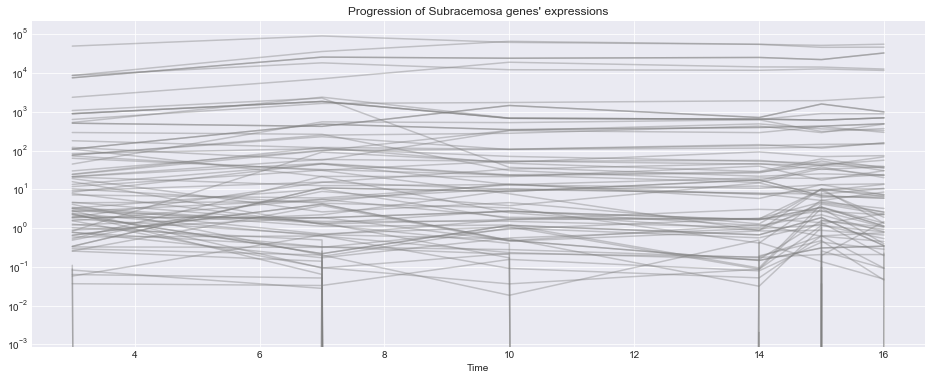

In [18]:
plt.figure(figsize=(16, 6))
ax = plt.gca()

subracemosa_unnormalized_spaghetti_df.plot.line(
    legend=False, 
    title="Progression of Subracemosa genes' expressions",
    ax=ax, 
    logy=True,
    grid=True,
    alpha=0.4,
    color='grey',
)
plt.savefig('subracemosa_progression_unnormalized.png', dpi=300)
plt.show()

In [19]:
subracemosa_diff_measurements = [f'{time}.1.diff' for time in times]
subracemosa_normalized_spaghetti_df = subracemosa_data[subracemosa_diff_measurements].T
subracemosa_normalized_spaghetti_df.index = diff_times
subracemosa_normalized_spaghetti_df.index.name = 'Time'

In [20]:
time = 7
cutoff = 5
interestting_subracemosa_df = subracemosa_normalized_spaghetti_df.T[subracemosa_normalized_spaghetti_df.T[time] > cutoff]
interestting_subracemosa_df

Time,3,7,10,14,15,16
L. subracemosa gene name,,,,,,
LsDhn2,6.327394,7.701476,7.779767,7.927755,7.935188,8.248351
LsDhn4,8.299057,9.363793,3.460635,2.726332,2.928812,2.802277
LsDhn6,5.702535,7.289888,8.707413,8.305499,8.294211,8.123114
LsDhn10,7.042541,7.910810,7.359673,7.193945,6.937406,6.951015
LsDhn13,5.517266,7.576758,8.447771,8.193004,8.101195,8.202240
LsLEA1-1,3.501434,7.090641,7.024795,7.268506,6.267164,6.514577
LsLEA2-16,4.251879,5.963176,6.119276,6.734928,6.179786,6.904920
LsLEA4-2,4.223601,6.473193,6.319960,6.710617,6.414249,6.874543
LsLEA4-4,6.732321,8.507156,8.409093,8.475931,8.293150,8.859891


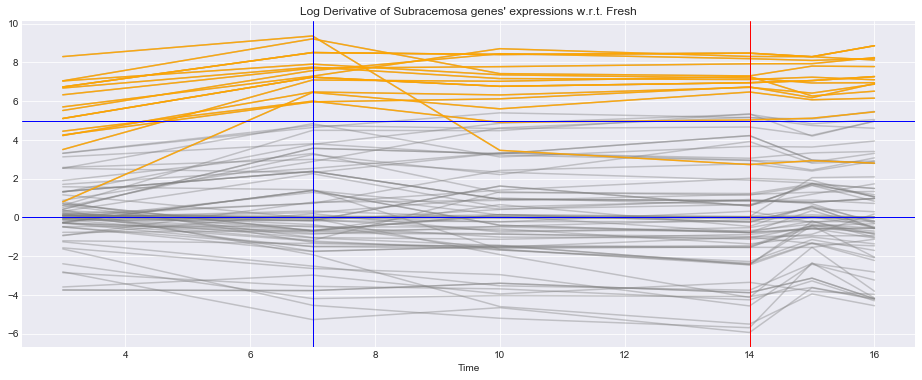

In [21]:
plt.figure(figsize=(16, 6))
ax = plt.gca()

subracemosa_normalized_spaghetti_df.plot.line(
    legend=False, 
    title="Log Derivative of Subracemosa genes' expressions w.r.t. Fresh",
    ax=ax, 
    alpha=0.4,
    color='grey',
)

interestting_subracemosa_df.T.plot.line(
    legend=False, 
    ax=ax, 
    alpha=0.9,
    color='orange',
)

plt.axhline(0.0, lw=1, color='blue')
plt.axhline(cutoff, lw=1, color='blue')
plt.axvline(time, lw=1, color='blue')
plt.axvline(14, lw=1, color='red')


interestting_subracemosa_df.to_csv('interesting_subracemosa.csv')
plt.savefig('subracemosa_progression_normalized.png', dpi=300)
plt.show()

# Paired

Examine the progression of the ratios of the corresponding orthologs' expressions between Brevida and Subracemosa.

In [22]:
overlap_slice = brevidens_slice & subracemosa_slice
print(f'There are {overlap_slice.sum()} genes for which there is data for both Brevidens and Subracemosa.')

There are 70 genes for which there is data for both Brevidens and Subracemosa.


In [23]:
ratio_data = df.loc[overlap_slice, brevidens_rows + subracemosa_rows]
ratio_data['L. brevidens gene name'] = df.loc[overlap_slice, 'L. brevidens gene name']
ratio_data['L. subracemosa gene name'] = df.loc[overlap_slice, 'L. subracemosa gene name']

In [24]:
wiggle_factor = 0.01

for measurement in times:
    ratio_data[f'brevidens.{measurement}.diff'] = (
        (wiggle_factor + ratio_data[measurement]) / 
        (wiggle_factor + ratio_data['untreated'])
    )
    ratio_data[f'subracemosa.{measurement}.diff'] = (
        (wiggle_factor + ratio_data[f'{measurement}.1']) / 
        (wiggle_factor + ratio_data['untreated.1'])
    )
    ratio_data[f'ratio.{measurement}.diff'] = np.log2(
        ratio_data[f'brevidens.{measurement}.diff'] / 
        ratio_data[f'subracemosa.{measurement}.diff']
    )
    
ratio_diff_measurements = [f'ratio.{time}.diff' for time in times]
ratio_normalized_spaghetti_df = ratio_data[ratio_diff_measurements].T
ratio_normalized_spaghetti_df.index = diff_times
ratio_normalized_spaghetti_df.index.name = 'Dry Time'

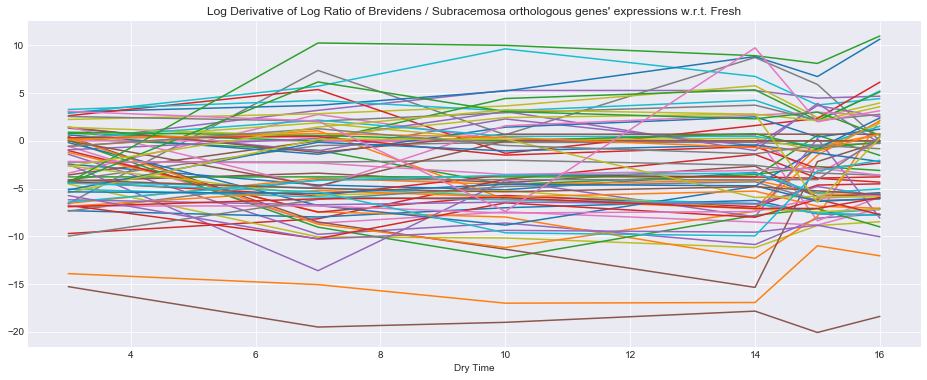

In [25]:
plt.figure(figsize=(16, 6))
ax = plt.gca()

ratio_normalized_spaghetti_df.plot.line(
    legend=False, 
    title="Log Derivative of Log Ratio of Brevidens / Subracemosa orthologous genes' expressions w.r.t. Fresh",
    ax=ax, 
    #grid=True,
    #alpha=0.4,
    #color='grey',
)

#plt.axhline(0.0, lw=4, color='black')
#plt.axhline(2.0, lw=4, color='grey')

plt.savefig('ratio_progression_normalized.png', dpi=300)
plt.show()

In [26]:
ratio_data.loc[ratio_data['ratio.dry7.diff'] > 3, ['L. brevidens gene name', 'L. subracemosa gene name']]

,L. brevidens gene name,L. subracemosa gene name
22,LbLEA2-3b,LsLEA2-1
25,LbLEA2-6,LsLEA2-6
27,LbLEA2-8,LsLEA2-8
28,LbLEA2-9,LsLEA2-9
31,LbLEA2-12,LsLEA2-12
37,LbLEA2-18,LsLEA2-18
80,LbLEA4-5,LsLEA4-5
90,LbLEA5-1,LsLEA5-1


In [27]:
ratio_data.loc[ratio_data['ratio.dry10.diff'] < -10, ['L. brevidens gene name', 'L. subracemosa gene name']]

,L. brevidens gene name,L. subracemosa gene name
15,LbLEA1-2,LsLEA1-2
19,LbLEA2-1,LsLEA2-1
30,LbLEA2-11,LsLEA2-11
33,LbLEA2-14,LsLEA2-14
49,LbLEA2-30,LsLEA2-30
83,LbLEA4-8,LsLEA4-4


In [28]:
#pd.DataFrame(np.log(brevidens_data + 1), index=brevidens_data.index)

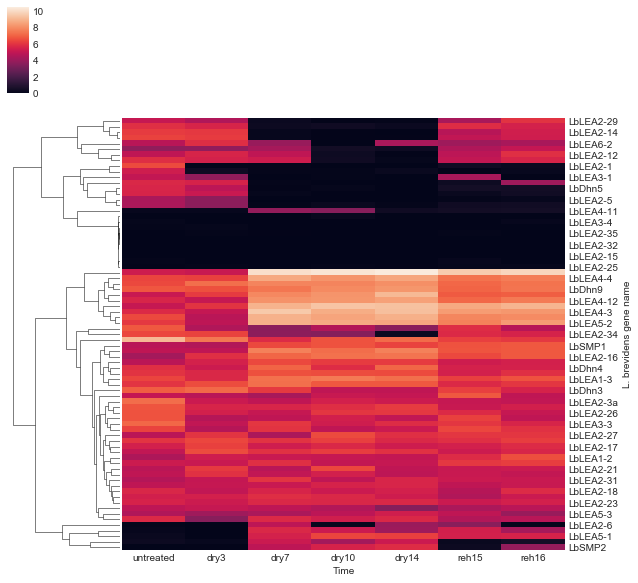

In [29]:
sns.clustermap(np.log(1 + brevidens_unnormalized_spaghetti_df.T), col_cluster=False)

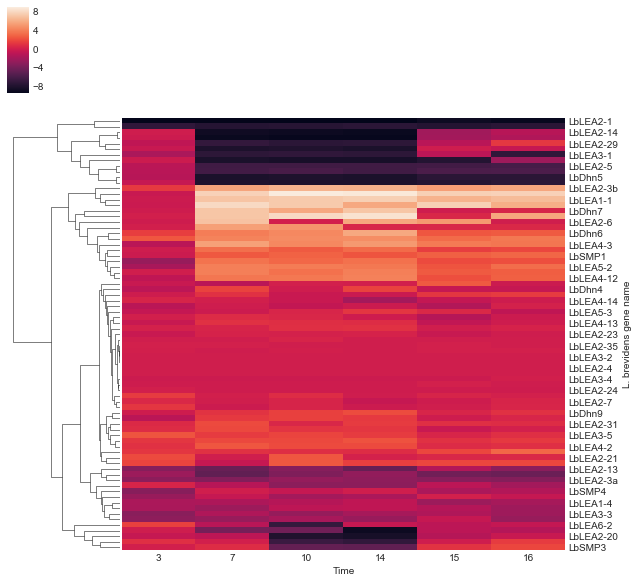

In [30]:
sns.clustermap(brevidens_normalized_spaghetti_df.T, col_cluster=False)